In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
salary_ranges = pd.read_csv('data/Salary_Ranges_by_Job_Classification.csv')

In [3]:
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [7]:
# check sample size
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [8]:
# check missing values
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [9]:
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [10]:
salary_ranges.describe(include=['O'])

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Biweekly High Rate,Biweekly Low Rate,Pay Type
count,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356
unique,2,1268,6,6,1,1,688,593,573,6
top,COMMN,3541,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,$3460.00,$4206.00,B
freq,1274,2,1266,1267,1356,1356,61,12,13,1337


In [12]:
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]

In [13]:
salary_ranges.head()

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000


In [14]:
salary_ranges.describe()

,Biweekly High Rate,Grade
count,1356,1356
unique,593,688
top,$3460.00,00000
freq,12,61


In [16]:
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].str.replace('$', '').astype(float)

In [17]:
salary_ranges['Biweekly High Rate'].describe()

count     1356.000000
mean      3161.727021
std       1481.002904
min          0.000000
25%       2145.000000
50%       2856.500000
75%       3703.000000
max      12120.770000
Name: Biweekly High Rate, dtype: float64

In [18]:
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
Biweekly High Rate    1356 non-null float64
Grade                 1356 non-null object
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


In [22]:
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head()

00000    61
07450    12
07420     9
07170     9
06870     9
Name: Grade, dtype: int64

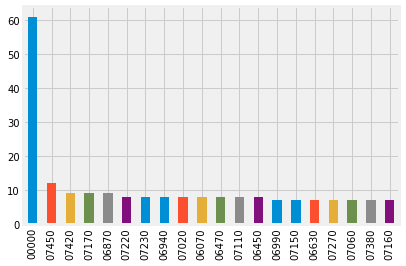

In [25]:
salary_ranges.Grade.value_counts(ascending=False).head(20).plot(kind='bar')

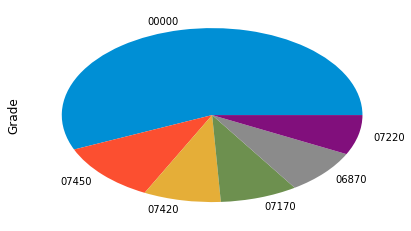

In [27]:
salary_ranges.Grade.value_counts(ascending=False).head(6).plot(kind='pie')

In [28]:
customer = pd.read_csv('data/2013_SFO_Customer_Survey.csv')

In [29]:
customer.head()

,RESPNUM,CCGID,RUN,INTDATE,GATE,STRATA,PEAK,METHOD,AIRLINE,FLIGHT,...,Q17_COUNTRY,HOME,Q18_AGE,Q19_SEX,Q20_INCOME,Q21_HIFLYER,Q22A_USESJC,Q22B_USEOAK,LANG,WEIGHT
0,1,1,1215,2,12,1,1,1,21,1437,...,US,1,2,1,1,2,2,1,1,0.553675
1,2,2,1215,2,12,1,1,1,21,1437,...,US,5,6,1,0,3,2,1,1,0.553675
2,3,3,1215,2,12,1,1,1,21,1437,...,US,1,4,2,2,3,2,2,1,0.553675
3,4,4,1215,2,12,1,1,1,21,1437,...,US,90,4,1,2,2,2,2,1,0.553675
4,5,5,1215,2,12,1,1,1,21,1437,...,US,10,3,1,3,1,0,1,1,0.553675


In [30]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

In [32]:
art_ratings = customer['Q7A_ART']

In [33]:
art_ratings.describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [40]:
# only ratings 1-5
art_ratings = art_ratings[(art_ratings < 6) & (art_ratings > 0)]

In [41]:
art_ratings = art_ratings.astype(str)

In [42]:
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

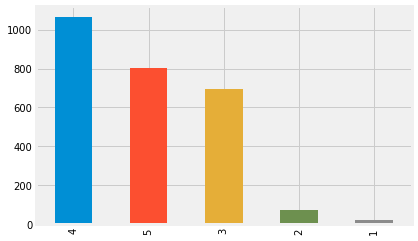

In [43]:
art_ratings.value_counts().plot(kind='bar')

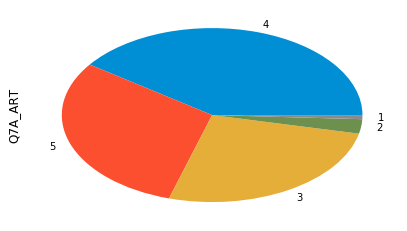

In [47]:
art_ratings.value_counts().plot(kind='pie')

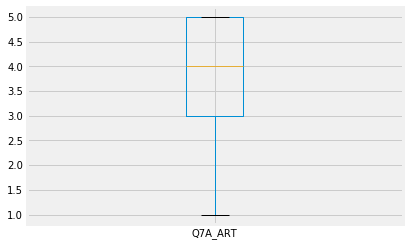

In [46]:
art_ratings.astype(float).plot.box()

In [48]:
climate = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')

In [49]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [50]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [51]:
climate.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [52]:
climate.dropna(axis=0, inplace=True)

In [53]:
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [54]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [56]:
climate['AverageTemperature'].nunique()

111994

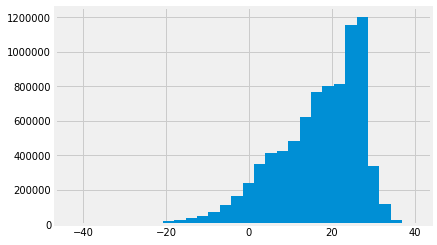

In [59]:
climate.AverageTemperature.hist(bins=30)

In [60]:
climate.AverageTemperature.describe()

count    8.235082e+06
mean     1.672743e+01
std      1.035344e+01
min     -4.270400e+01
25%      1.029900e+01
50%      1.883100e+01
75%      2.521000e+01
max      3.965100e+01
Name: AverageTemperature, dtype: float64

In [61]:
climate['dt'] = pd.to_datetime(climate['dt'])

In [63]:
climate['year'] = climate.dt.dt.year

In [64]:
climate['century'] = climate.year.map(lambda x: x//100 + 1)

In [67]:
climate_us = climate.query('Country == "United States"')

In [69]:
del climate

In [68]:
climate_us.shape

(661524, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001458BD1A828>,
      dtype=object)

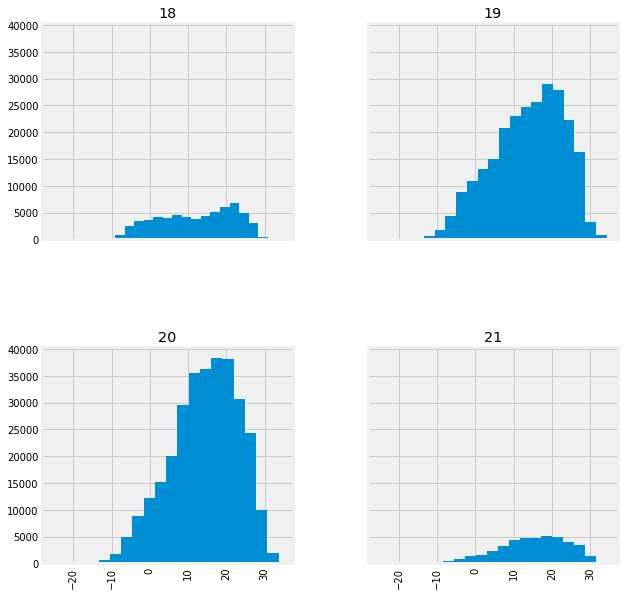

In [71]:
climate_us.AverageTemperature.hist(by=climate_us.century, 
                                   sharex=True, sharey=True, 
                                   figsize=(10, 10), bins=20)

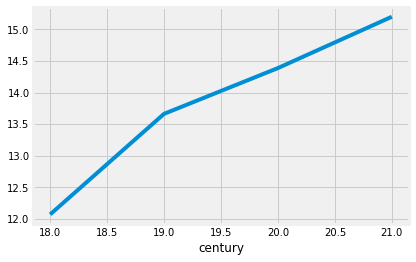

In [75]:
climate_us.groupby('century')['AverageTemperature'].mean().plot()

In [76]:
century_change = climate_us.groupby('century').mean()

In [80]:
century_change['AverageTemperature']

century
18    12.073243
19    13.662870
20    14.386622
21    15.197692
Name: AverageTemperature, dtype: float64

In [81]:
century_change.AverageTemperature[21] - century_change.AverageTemperature[18]

3.124449115460754

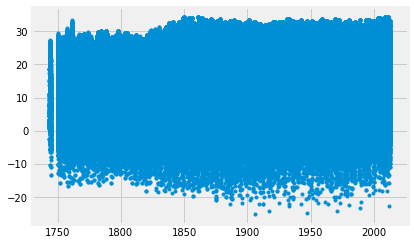

In [82]:
plt.plot(climate_us['year'], climate_us['AverageTemperature'], '.')

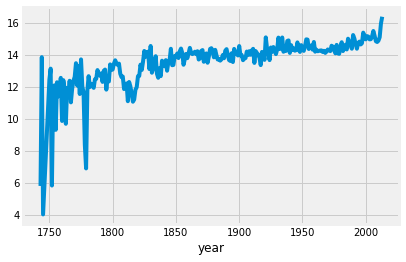

In [84]:
climate_us.groupby('year')['AverageTemperature'].mean().plot()

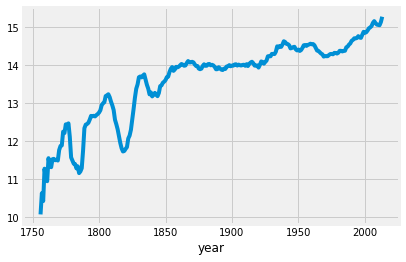

In [87]:
climate_us.groupby('year')['AverageTemperature'].mean().rolling(10).mean().plot()

In [94]:
mean_salary_by_grade = salary_ranges.groupby('Grade').mean().sort_values(by='Biweekly High Rate', ascending=False)

Text(0.5,1,'Top 20 Grade by average Biweekly High Rate')

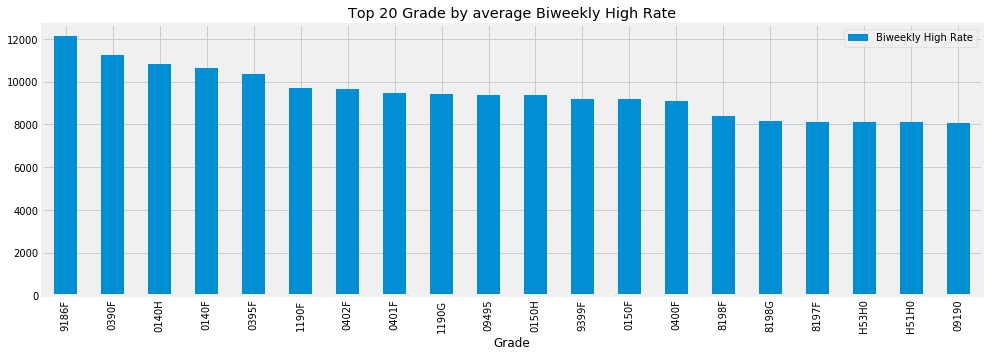

In [99]:
fig, ax = plt.subplots(figsize=(15, 5))
mean_salary_by_grade.head(20).plot.bar(ax=ax)
ax.set_title('Top 20 Grade by average Biweekly High Rate')

Text(0.5,1,'Bottom 20 Grade by average Biweekly High Rate')

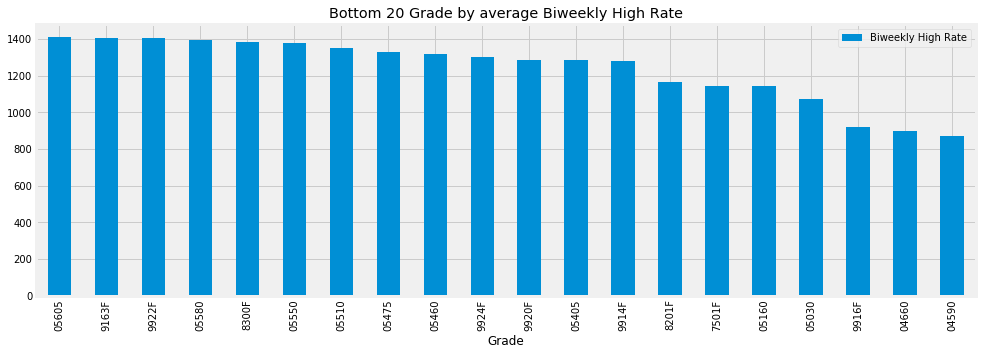

In [100]:
fig, ax= plt.subplots(figsize=(15, 5))
mean_salary_by_grade.tail(20).plot.bar(ax=ax)
ax.set_title('Bottom 20 Grade by average Biweekly High Rate')

In [104]:
# max-min ratio
mean_salary_by_grade.iloc[0] / mean_salary_by_grade.iloc[-1]

Biweekly High Rate    13.93192
dtype: float64

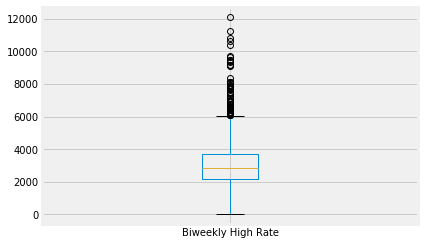

In [105]:
salary_ranges['Biweekly High Rate'].plot.box()

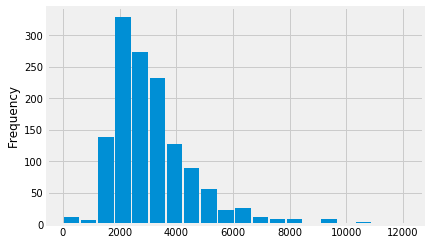

In [110]:
salary_ranges['Biweekly High Rate'].plot.hist(bins=20, rwidth=.9)